In [2]:
import os
import pandas as pd
from tqdm.autonotebook import tqdm
import glob
import patoolib
import numpy as np
import matplotlib.pyplot as plt

C:\Users\jacks\AppData\Local\Temp\ipykernel_9704\3559677255.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
# O diretorio onde os arquivos do repositorio clonado estão
Diretorio_local = "C:/Users/jacks/OneDrive/Projetos/combustiveis_automotivos"

dest_dir = f"{Diretorio_local}/arquivos-extraidos/"

rar_files = [f"{Diretorio_local}/Combustíveis Automotivos-2012-a-2022.rar"]

In [4]:
csv_files = glob.glob(f"{dest_dir}*.csv")

dataframes = []

progress_bar = tqdm(csv_files, desc="Lendo arquivos CSV")

encodings = ['utf-8', 'ISO-8859-1', 'latin-1']

for csv_file in progress_bar:
    for encoding in encodings:
        try:
            df = pd.read_csv(csv_file, sep=';', encoding=encoding)
            dataframes.append(df)
            break
        except Exception as e:
            print(f"Tentando codificação {encoding} para o arquivo {csv_file} - Erro: {e}")


combustiveis_automotivos_df = pd.concat(dataframes, ignore_index=True)
print("\nArquivos extraidos com sucesso!")

Lendo arquivos CSV:   0%|          | 0/22 [00:00<?, ?it/s]

Lendo arquivos CSV:  77%|███████▋  | 17/22 [01:06<00:18,  3.71s/it]C:\Users\jacks\AppData\Local\Temp\ipykernel_9704\3907117049.py:12: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, sep=';', encoding=encoding)
Lendo arquivos CSV:  86%|████████▋ | 19/22 [01:10<00:08,  2.91s/it]

Tentando codificação utf-8 para o arquivo C:/Users/jacks/OneDrive/Projetos/combustiveis_automotivos/arquivos-extraidos\ca-2021-02.csv - Erro: 'utf-8' codec can't decode byte 0xd3 in position 34: invalid continuation byte


Lendo arquivos CSV: 100%|██████████| 22/22 [01:20<00:00,  3.66s/it]



Arquivos extraidos com sucesso!


In [5]:
combustiveis_automotivos_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2012,"2,589",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2012,"1,969",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,03/01/2012,"1,879",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,00.603.738/0001-43,"QI-QUADRA INTERNA 18 LOTES 47, 49, 51 E 53",S/N,NaN,TAGUATINGA,72315-000,GASOLINA,05/01/2012,"2,83",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,00.603.738/0001-43,"QI-QUADRA INTERNA 18 LOTES 47, 49, 51 E 53",S/N,NaN,TAGUATINGA,72315-000,ETANOL,05/01/2012,"2,27",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [6]:
combustiveis_automotivos_df.tail()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
11168705,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,GASOLINA,30/12/2022,"5,04",NaN,R$ / litro,MAXSUL
11168706,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,DIESEL S10,30/12/2022,"6,19",NaN,R$ / litro,MAXSUL
11168707,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA ADITIVADA,30/12/2022,"5,31",NaN,R$ / litro,VIBRA ENERGIA
11168708,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA,30/12/2022,"5,11",NaN,R$ / litro,VIBRA ENERGIA
11168709,S,SC,BLUMENAU,FISCHER COMBUSTIVEL EIRELI,31.713.751/0002-60,RUA SETE DE SETEMBRO,780,POSTO,CENTRO,89010-200,GASOLINA,30/12/2022,"5,09",NaN,R$ / litro,IPIRANGA


In [7]:
combustiveis_automotivos_df.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [ ]:
combustiveis_automotivos_df.isnull().sum()

In [8]:
combustiveis_automotivos_df = combustiveis_automotivos_df.drop(['Revenda',
                                                                'CNPJ da Revenda',
                                                                'Nome da Rua',
                                                                'Numero Rua',
                                                                'Complemento',
                                                                'Bairro',
                                                                'Cep',
                                                                'Valor de Compra'
], axis=1)

In [9]:
combustiveis_automotivos_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,GASOLINA,03/01/2012,"2,589",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,ETANOL,03/01/2012,"1,969",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,DIESEL,03/01/2012,"1,879",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,CO,DF,BRASILIA,GASOLINA,05/01/2012,"2,83",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,ETANOL,05/01/2012,"2,27",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [10]:
combustiveis_automotivos_df = combustiveis_automotivos_df.dropna(axis=0)

In [12]:
combustiveis_automotivos_df.isnull().sum()

Regiao - Sigla       0
Estado - Sigla       0
Municipio            0
Produto              0
Data da Coleta       0
Valor de Venda       0
Unidade de Medida    0
Bandeira             0
dtype: int64

In [13]:
combustiveis_automotivos_df.shape

(11168709, 8)

In [14]:
combustiveis_automotivos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11168709 entries, 0 to 11168709
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Regiao - Sigla     object
 1   Estado - Sigla     object
 2   Municipio          object
 3   Produto            object
 4   Data da Coleta     object
 5   Valor de Venda     object
 6   Unidade de Medida  object
 7   Bandeira           object
dtypes: object(8)
memory usage: 766.9+ MB


In [17]:
formato_data = '%d/%m/%Y'  # Formato dia/mês/ano
combustiveis_automotivos_df['Data da Coleta'] = pd.to_datetime(combustiveis_automotivos_df['Data da Coleta'], format=formato_data)

# Convertendo a coluna 'Valor de Venda' para float
combustiveis_automotivos_df['valor_venda'] = combustiveis_automotivos_df['Valor de Venda'].str.replace(',', '.').astype(float)

# Exibindo informações do DataFrame
combustiveis_automotivos_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11168709 entries, 0 to 11168709
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Regiao - Sigla     object        
 1   Estado - Sigla     object        
 2   Municipio          object        
 3   Produto            object        
 4   Data da Coleta     datetime64[ns]
 5   Valor de Venda     object        
 6   Unidade de Medida  object        
 7   Bandeira           object        
 8   valor_venda        float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 852.1+ MB


In [30]:
analise_valor_vendas = combustiveis_automotivos_df['valor_venda'].describe().transpose()

In [31]:
analise_valor_vendas

count    1.116871e+07
mean     3.417548e+00
std      1.257847e+00
min      1.009000e+00
25%      2.579000e+00
50%      3.090000e+00
75%      3.890000e+00
max      9.650000e+00
Name: valor_venda, dtype: float64

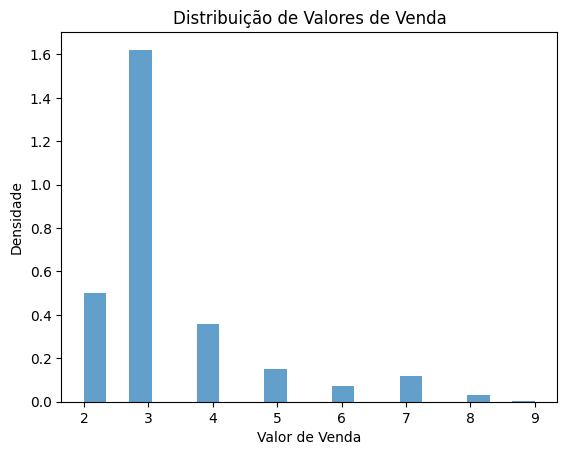

In [39]:
# Limpa a coluna 'Valor de Venda' e converte para float
combustiveis_automotivos_df['Valor de Venda'] = pd.to_numeric(combustiveis_automotivos_df['Valor de Venda'], errors='coerce')

# Remove linhas com valores ausentes em 'Valor de Venda'
combustiveis_automotivos_df = combustiveis_automotivos_df.dropna(subset=['Valor de Venda'])

# Calcula a distribuição dos valores de venda
hist, edges = np.histogram(combustiveis_automotivos_df['Valor de Venda'], bins=20, density=True)
bin_labels = [f"{edges[i]:.2f} - {edges[i+1]:.2f}" for i in range(len(edges)-1)]
combustiveis_automotivos_df['distribuicao_vendas'] = pd.cut(combustiveis_automotivos_df['Valor de Venda'], bins=edges, labels=bin_labels, include_lowest=True)

# Plota o histograma da distribuição de valores de venda
plt.hist(combustiveis_automotivos_df['Valor de Venda'], bins=20, density=True, alpha=0.7)
plt.xlabel('Valor de Venda')
plt.ylabel('Densidade')
plt.title('Distribuição de Valores de Venda')
plt.show()


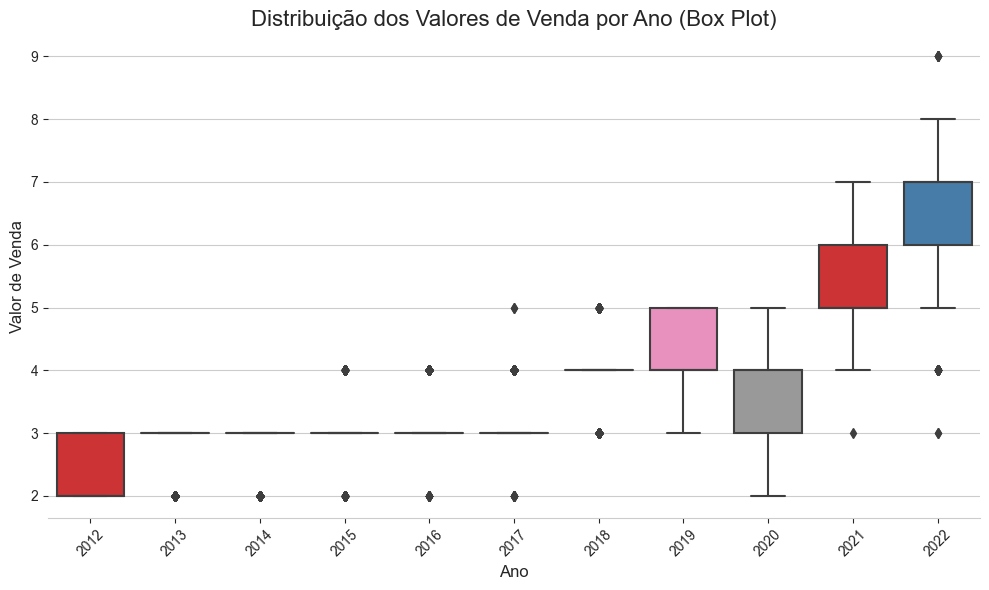

In [42]:
# Limpa a coluna 'Valor de Venda' e converte para float
combustiveis_automotivos_df['Valor de Venda'] = pd.to_numeric(combustiveis_automotivos_df['Valor de Venda'], errors='coerce')

# Remove linhas com valores ausentes em 'Valor de Venda'
combustiveis_automotivos_df = combustiveis_automotivos_df.dropna(subset=['Valor de Venda'])

# Extrai o ano da coluna 'Data da Coleta'
combustiveis_automotivos_df['Ano'] = combustiveis_automotivos_df['Data da Coleta'].dt.year

# Configuração de estilo Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set1")

# Criação do gráfico de box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=combustiveis_automotivos_df, x='Ano', y='Valor de Venda', palette='Set1')

# Título e rótulos
plt.title('Distribuição dos Valores de Venda por Ano (Box Plot)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor de Venda', fontsize=12)
sns.despine(left=True)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [45]:
combustiveis_automotivos_df.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Produto',
       'Data da Coleta', 'Valor de Venda', 'Unidade de Medida', 'Bandeira',
       'valor_venda', 'distribuicao_vendas', 'Ano'],
      dtype='object')

In [48]:
combustiveis_automotivos_df = combustiveis_automotivos_df.set_index('Data da Coleta')
combustiveis_automotivos_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,valor_venda,distribuicao_vendas,Ano
Data da Coleta,,,,,,,,,,
2012-01-02,NE,AL,SANTANA DO IPANEMA,ETANOL,2.0,R$ / litro,SETTA DISTRIBUIDORA,2.0,2.00 - 2.35,2012
2012-01-03,N,AM,ITACOATIARA,GASOLINA,3.0,R$ / litro,BRANCA,3.0,2.70 - 3.05,2012
2012-01-03,N,AM,ITACOATIARA,GASOLINA,3.0,R$ / litro,DNP,3.0,2.70 - 3.05,2012
2012-01-03,N,AM,ITACOATIARA,GASOLINA,3.0,R$ / litro,BRANCA,3.0,2.70 - 3.05,2012
2012-01-02,N,AP,PORTO GRANDE,GASOLINA,3.0,R$ / litro,BRANCA,3.0,2.70 - 3.05,2012
